In [1]:
%load_ext zipline
%load_ext watermark
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import pytz

# необходимые функции zipline
from zipline.api import (order, record, symbol, set_benchmark, order_target_percent, get_open_orders, order_target, 
                        schedule_function, date_rules, time_rules, order_percent, symbols)

# комиссии
from zipline.finance import commission

# выбор календаря по которому происходит торговля
from trading_calendars.always_open import AlwaysOpenCalendar

import zipline

# графика
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# работа с временем
from datetime import datetime, date

# aинансовые данные
from yahoofinancials import YahooFinancials

# ignore warnings
import warnings

# отчёт
import pyfolio as pf

# import helper functions 
import qf_helper_functions as qf

import pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import pylab

from tqdm import tqdm

In [89]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [16, 7]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [90]:
data = pd.read_csv("data/Perf.csv", index_col=0, delimiter=';', parse_dates=['Date'])

In [91]:
data.head()

,Paradigm,BTC
Date,,
2016-08-10,1000000,1000000
2016-08-11,999963,983524
2016-08-12,999865,982687
2016-08-13,999540,980613
2016-08-14,995144,957714


In [97]:
window = 365

In [98]:
# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 365 days data have an expanding window
Roll_Max1 = pd.rolling_max(data['Paradigm'], window, min_periods=1)
Roll_Max2 = pd.rolling_max(data['BTC'], window, min_periods=1)
Daily_Drawdown1 = data['Paradigm']/Roll_Max1 - 1.0
Daily_Drawdown2 = data['BTC']/Roll_Max2 - 1.0

In [99]:
# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown1 = pd.rolling_min(Daily_Drawdown1, window, min_periods=1)
Max_Daily_Drawdown2 = pd.rolling_min(Daily_Drawdown2, window, min_periods=1)

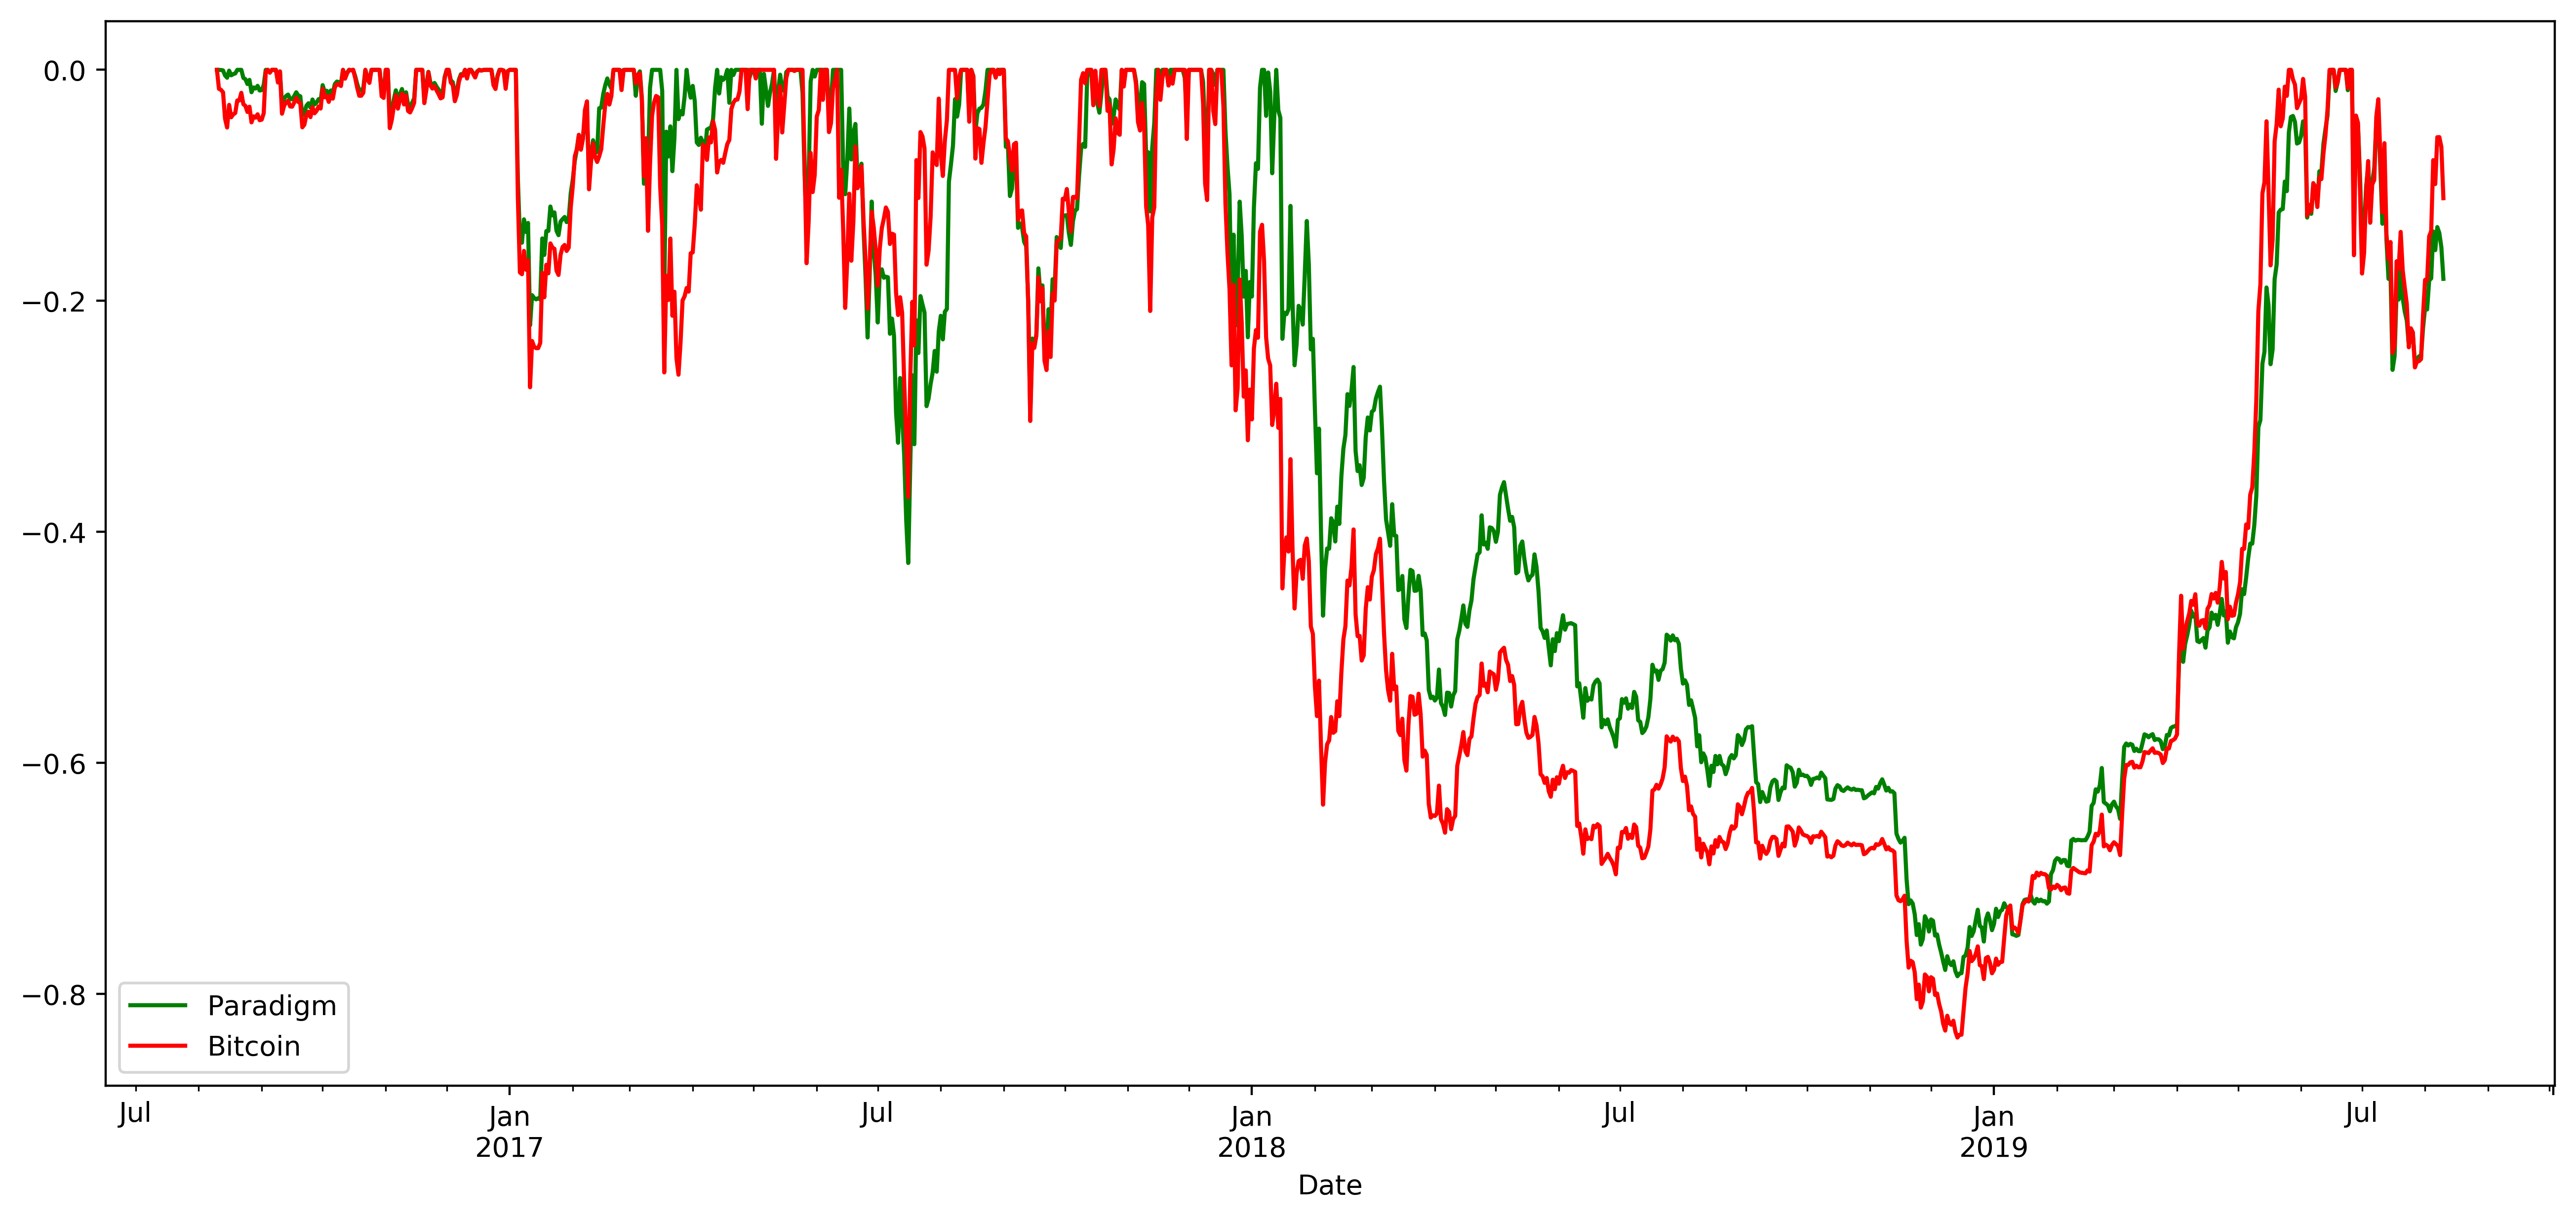

In [105]:
# Plot the results
fig, ax = plt.subplots(figsize=[16, 7])
Daily_Drawdown1.plot(color='g', label='Paradigm')
Daily_Drawdown2.plot(color='r', label='Bitcoin')
plt.legend()
plt.show()

In [110]:
fig.savefig('drawdown.png', transparent=False, dpi=300, bbox_inches="tight")